Q1)Environment: The environment is a village called “Binary”pur, with two categories of people: category 0 is Kid and category 1 is Adult.

Let us assume that the kids height would be ranging from 2-4.5 feet and Adults height from 4.5-6.5 feet;

1 	St: 1 	At: 1 	Rt: 1 	Ht: 5.4
2 	St: 1 	At: 1 	Rt: 1 	Ht: 5.8
3 	St: 0 	At: 0 	Rt: 1 	Ht: 4
4 	St: 1 	At: 1 	Rt: 1 	Ht: 6.4
5 	St: 0 	At: 0 	Rt: 1 	Ht: 3
6 	St: 0 	At: 0 	Rt: 1 	Ht: 2.2
7 	St: 1 	At: 1 	Rt: 1 	Ht: 6.4
8 	St: 1 	At: 1 	Rt: 1 	Ht: 6.4
9 	St: 1 	At: 1 	Rt: 1 	Ht: 5.6
10 	St: 1 	At: 1 	Rt: 1 	Ht: 5.2
11 	St: 1 	At: 1 	Rt: 1 	Ht: 6
12 	St: 1 	At: 1 	Rt: 1 	Ht: 6.2
13 	St: 0 	At: 0 	Rt: 1 	Ht: 3.8
14 	St: 1 	At: 1 	Rt: 1 	Ht: 5.6
15 	St: 1 	At: 1 	Rt: 1 	Ht: 6.4
16 	St: 1 	At: 1 	Rt: 1 	Ht: 4.6
17 	St: 1 	At: 1 	Rt: 1 	Ht: 5
18 	St: 1 	At: 1 	Rt: 1 	Ht: 6
19 	St: 1 	At: 1 	Rt: 1 	Ht: 6.4
20 	St: 1 	At: 1 	Rt: 1 	Ht: 4.8
21 	St: 1 	At: 1 	Rt: 1 	Ht: 6.4
22 	St: 1 	At: 1 	Rt: 1 	Ht: 5.4
23 	St: 0 	At: 0 	Rt: 1 	Ht: 3.4
24 	St: 0 	At: 0 	Rt: 1 	Ht: 4.4
25 	St: 0 	At: 0 	Rt: 1 	Ht: 2.8
26 	St: 1 	At: 1 	Rt: 1 	Ht: 4.8
27 	St: 0 	At: 0 	Rt: 1 	Ht: 3.8
28 	St: 0 	At: 0 	Rt: 1 	Ht: 4
29 	St: 0 	At: 0 	Rt: 1 	Ht: 4
30 	St: 1 	At: 1 	Rt: 1 	Ht: 5.8
31 	St: 1 	At: 1 	Rt: 1 	Ht: 4.8


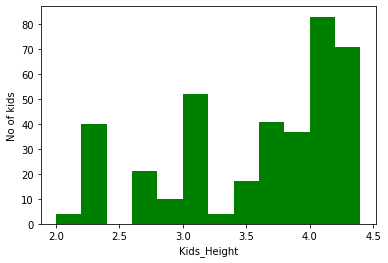

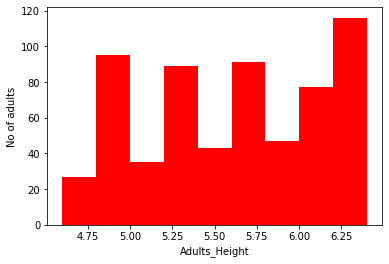

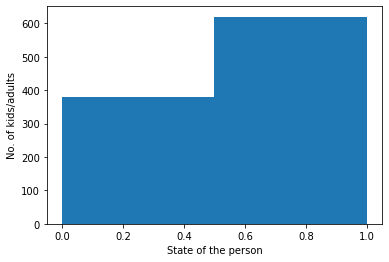

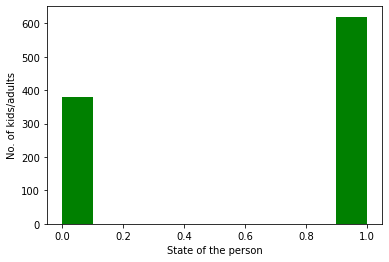


The average performance of the agent basedd on rewards is: 1.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
# Probabilty of the object being Adult=0.6 and Kid=0.4:
#State array to know the actual state i.e. Kid or Adult
state=[]
#The act that is predicted by the Robot
action=[]
#height of the respective person using probability distribution
height=[]
#To check if the prediction was right or not
reward=[]
#   Environment Function
def Environment():
    return (np.random.randint(1,11))
#   Agent Function
def Agent(prob):
    rand_number=np.random.uniform(0,100)
    new_sum=0
    prev_sum=0
    if(prob<=4):
        state.append(0)
        for j in range(13):
            new_sum+=prob_dist_kid[j]
            #To check in which range our random number falls to predict the height
            if(prev_sum<rand_number and rand_number<=new_sum):
                height.append(kid_height[j])
                break;
            prev_sum=new_sum
    else:
        state.append(1)
        for j in range(10):
            new_sum+=prob_dist_adult[j]
            #To check in which range our random number falls to predict the height
            if(prev_sum<rand_number and rand_number<=new_sum):
                height.append(adult_height[j])
                break;
            prev_sum=new_sum
    if(height[i]>=2 and height[i]<=4.4):
        action.append(0)
    else:
        action.append(1)
    if(action[i]==state[i]):
        reward.append(1)
    else:
        reward.append(0)

kid_height=[2,2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4,4.2,4.4]
prob_dist_kid=[1,9,0.5,5,4.5,15,0.8,4.2,13,7,22,8,10]
adult_height=[4.6,4.8,5,5.2,5.4,5.6,5.8,6,6.2,6.4]
prob_dist_adult=[5,15,6,14,7,13,8,12,9,11]
#To make 1000 test cases
for i in range(1000):
    prob=Environment()
    Agent(prob)
for i in range(1000):
    print(i+1,"\tSt:",state[i],"\tAt:",action[i],"\tRt:",reward[i],"\tHt:",height[i])
#  b) To plot the histogram of number of kids and adults
plot_1=plt.figure(1)
plt.hist(height,bins=[2,2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4,4.2,4.4],color="green")
plt.xlabel("Kids_Height")
plt.ylabel("No of kids")
plot_2=plt.figure(2)
plt.hist(height,bins=[4.6,4.8,5,5.2,5.4,5.6,5.8,6,6.2,6.4],color="red")
plt.xlabel("Adults_Height")
plt.ylabel("No of adults")
plt.show()
plot_3=plt.figure(3)
plt.hist(state,bins=[0,0.5,1])
plt.xlabel("State of the person")
plt.ylabel("No. of kids/adults")
plt.show()
plot_3=plt.figure(4)
plt.hist(state,color='g')
plt.xlabel("State of the person")
plt.ylabel("No. of kids/adults")
plt.show()
#  c)Measure the performance of the agent, i.e., average reward.
average_reward=sum(reward)/1000
print("\nThe average performance of the agent basedd on rewards is:",average_reward)


Q2)ROOM CLEANER ROBOT:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Let the size of each side of the room be 8
size=8
#   Class of the data related to Agent
class Agent_class:
    x=0
    y=0
Agent_ravi=Agent_class()
Agent_ravi.x=np.random.randint(0,size)   #To assign a random x coordinate in the room
Agent_ravi.y=np.random.randint(0,size)   #To assign random y coordinate in the room
sum=0
# dirt_tiles is an matrix for coordinates and amount of dirt in each tile
dirt_tiles=[[0 for i in range(size)] for j in range(size)] 
for i in range(10):
    dirt_tiles[np.random.randint(0,size)][np.random.randint(0,size)]=np.random.randint(0,10)
#   rew_fr_act : to reward the action and to update the action in the agent
def rew_fr_act(a):
    if a=="left":
        if Agent_ravi.x>0:
            Agent_ravi.x-=1
            return 0
        else:
            return -10
    elif a=="right":
        if Agent_ravi.x<size-1:
            Agent_ravi.x+=1
            return 0
        else:
            return -10
    elif a=="up":
        if Agent_ravi.y>0:
            Agent_ravi.y-=1
            return 0
        else:
            return -10
    elif a=="down":
        if Agent_ravi.y<size-1:
            Agent_ravi.y+=1
            return 0
        else:
            return -10
    else:
        if dirt_tiles[Agent_ravi.x][Agent_ravi.y]==0:
            return -1
        else:
            #Reward for picking dirt at correct place is amount of dirt at that place:
            sample_value=dirt_tiles[Agent_ravi.x][Agent_ravi.y]
            dirt_tiles[Agent_ravi.x][Agent_ravi.y]=0
            return sample_value

print("The dirt matrix containing coordinate and amount of dirt:")
for i in range(size):
    print(dirt_tiles[i]) 
action_set=["left","right","up","down","pick_dirt"]
#Agent_function to choose an act
def Agent_function():
    return np.random.choice(action_set)

for i in range(100):
    print("\nTestcase:",i+1,"\tLocation of robo:(",Agent_ravi.x+1,",",Agent_ravi.y+1,")")
    print("Amount of dirt at the Agents_coordinate:",dirt_tiles[Agent_ravi.x][Agent_ravi.y])
    action=Agent_function()
    reward=rew_fr_act(action)
    print("The Agents action:",action,"\nReward:",reward,"\tNew location of robo:(",Agent_ravi.x+1,",",Agent_ravi.y+1,")")
    sum+=reward
# b)The performance of the agent i.e. average reward obtained:
print("\nThe average reward obtained:",sum/100)

The dirt matrix containing coordinate and amount of dirt:
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 9, 0]
[0, 0, 0, 0, 0, 8, 0, 0]
[6, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 6, 0, 0, 2, 0, 3]
[0, 0, 4, 0, 0, 0, 0, 0]
[0, 0, 5, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0]

Testcase: 1 	Location of robo:( 3 , 1 )
Amount of dirt at the Agents_coordinate: 0
The Agents action: pick_dirt 
Reward: -1 	New location of robo:( 3 , 1 )

Testcase: 2 	Location of robo:( 3 , 1 )
Amount of dirt at the Agents_coordinate: 0
The Agents action: pick_dirt 
Reward: -1 	New location of robo:( 3 , 1 )

Testcase: 3 	Location of robo:( 3 , 1 )
Amount of dirt at the Agents_coordinate: 0
The Agents action: pick_dirt 
Reward: -1 	New location of robo:( 3 , 1 )

Testcase: 4 	Location of robo:( 3 , 1 )
Amount of dirt at the Agents_coordinate: 0
The Agents action: up 
Reward: -10 	New location of robo:( 3 , 1 )

Testcase: 5 	Location of robo:( 3 , 1 )
Amount of dirt at the Agents_coordinate: 0
The Agents action: left 
Reward: 0 	